In [1]:
using Phylo, Plots, FASTX, MolecularEvolution, CodonMolecularEvolution, JLD2

In [3]:
analysis_name = "output/Ace2"
seqnames,seqs = read_fasta("../test/data/Ace2_tiny/Ace2_tiny_tagged.fasta");
treestring, tags, tag_colors = import_colored_figtree_nexus_as_tagged_tree("../test/data/Ace2_tiny/Ace2_tiny_tagged.nex")
df,results = difFUBAR(seqnames, seqs, treestring, tags, analysis_name);

Step 1: Initialization. If exports = true, tree showing the assignment of branches to groups/colors will be exported to: output/Ace2_tagged_input_tree.svg.
Step 2: Optimizing global codon model parameters.
Optimized single α,β LL=-17461.80292552851 with α=1.688175953772318 and β=0.830522823141943.
Step 3: Calculating grid of 12096-by-808 conditional likelihood values (the slowest step). Currently on:
0.0% 4.0% 8.0% 12.0% 17.0% 21.0% 25.0% 29.0% 33.0% 37.0% 41.0% 45.0% 50.0% 54.0% 58.0% 62.0% 66.0% 70.0% 74.0% 79.0% 83.0% 87.0% 91.0% 95.0% 99.0% 
Step 4: Running Gibbs sampler to infer site categories.
Step 5: Tabulating and plotting. Detected sites:
Site 3 - P(ω1 > ω2):0.01; P(ω2 > ω1):0.9725; P(ω1 > 1):0.1395; P(ω2 > 1):0.9425
Site 26 - P(ω1 > ω2):0.978; P(ω2 > ω1):0.0055; P(ω1 > 1):0.9425; P(ω2 > 1):0.1085
Site 29 - P(ω1 > ω2):0.9775; P(ω2 > ω1):0.0045; P(ω1 > 1):0.996; P(ω2 > 1):0.186
Site 36 - P(ω1 > ω2):0.9945; P(ω2 > ω1):0.001; P(ω1 > 1):0.9575; P(ω2 > 1):0.036
Site 68 - P(ω1 > ω2

In [3]:
binarize=false
exports=true
verbosity=1
plot_collection = NamedTuple[]
tree, tags, tag_colors, analysis_name = CodonMolecularEvolution.difFUBAR_init(analysis_name, treestring, tags, tag_colors=tag_colors, exports=exports, verbosity=verbosity, disable_binarize=!binarize, plot_collection = plot_collection)
leaf_name_transform = CodonMolecularEvolution.generate_tag_stripper(tags)
code = MolecularEvolution.universal_code
tree, LL, alpha, beta, GTRmat, F3x4_freqs, eq_freqs = CodonMolecularEvolution.difFUBAR_global_fit_2steps(seqnames, seqs, tree, leaf_name_transform, code; verbosity=1, optimize_branch_lengths=false)

(FelNode
nodeindex: 1763095780872
Root: true
Leaf: false
Defined fields:
true	 parent
true	 children
true	 branchlength
true	 name
true	 nodeindex
true	 seqindex
false	 state_path
false	 branch_params
false	 node_data
true	 message
true	 parent_message
true	 child_messages
, -17461.80292552851, 1.688175953772318, 0.830522823141943, [-3.7018768812131664 0.9881548146032798 2.216254078366261 0.49746798824362554; 0.9881548146032798 -4.5115707362647175 0.8820577752830622 2.641358146378376; 2.216254078366261 0.8820577752830622 -3.607584349715228 0.5092724960659045; 0.49746798824362554 2.641358146378376 0.5092724960659045 -3.648098630687906], [0.3037803780378038 0.1911941194119412 0.3028802880288029 0.1979072907290729; 0.3571107110711071 0.20424542454245426 0.15447794779477947 0.27992799279927993; 0.2496999699969997 0.2142964296429643 0.23923642364236425 0.2925292529252925], [0.02866025516940132, 0.02459668039020113, 0.027459262199701268, 0.033576147540001544, 0.016391908176072213, 0.01406779

In [4]:
version=nothing
t=0
con_lik_matrix, _, codon_param_vec, alphagrid, omegagrid, _, shallow_tree = CodonMolecularEvolution.difFUBAR_grid(tree,
            tags,
            GTRmat,
            F3x4_freqs,
            code,
            verbosity=verbosity,
            foreground_grid=2,
            background_grid=2,
            version=version,
            t=t)
println(size(codon_param_vec))

In [5]:
println(typeof(codon_param_vec))

In [6]:
include("../src/difFUBAR/skbDifFUBAR.jl")
results = skbdifFUBAR(seqnames, seqs, treestring, tags,"output/Ace2", tag_colors)


LoadError: LoadError: SystemError: opening file "test/data/Ace2_tiny/Ace2_tiny_tagged.fasta": No such file or directory
in expression starting at c:\Users\toven\Documents\tove-code\CodonMolecularEvolution.jl-1\src\difFUBAR\skbDifFUBAR.jl:162

In [2]:
@load "../output/alloc_grid.jld2" alloc_grid
@load "../output/ambient_samples.jld2" ambient_samples
@load "../output/grid.jld2" output_grid


┌ Warning: type Main.SKBDIModel does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\toven\.julia\packages\JLD2\SgtOb\src\data\reconstructing_datatypes.jl:588
┌ Warning: type Main.#18#24 does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\toven\.julia\packages\JLD2\SgtOb\src\data\reconstructing_datatypes.jl:472
┌ Warning: type Main.#23#29{Float64,Float64,Matrix{Int64}} does not exist in workspace; reconstructing
└ @ JLD2 C:\Users\toven\.julia\packages\JLD2\SgtOb\src\data\reconstructing_datatypes.jl:588


1-element Vector{Symbol}:
 :output_grid

In [4]:
include("../src/difFUBAR/skbDifFUBAR.jl")

LoadError: LoadError: SystemError: opening file "test/data/Ace2_tiny/Ace2_tiny_tagged.fasta": No such file or directory
in expression starting at c:\Users\toven\Documents\tove-code\CodonMolecularEvolution.jl-1\src\difFUBAR\skbDifFUBAR.jl:314

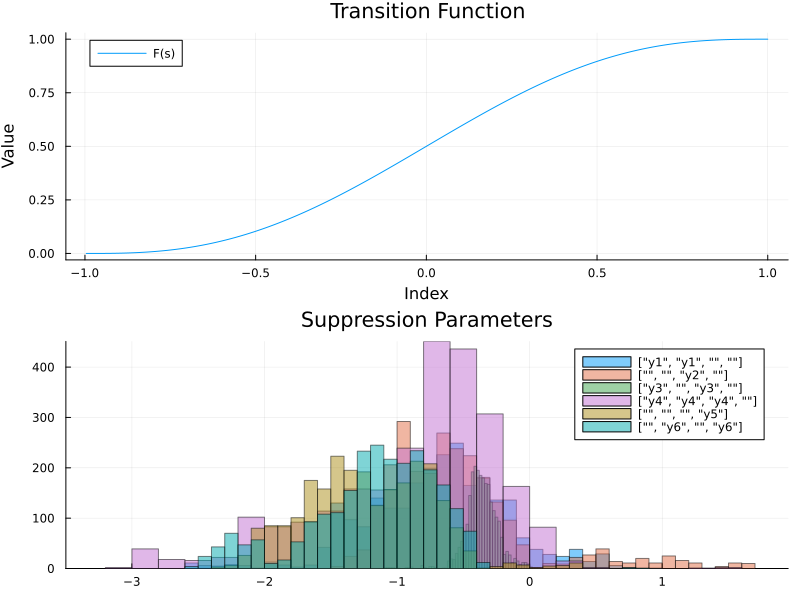

In [ ]:
s_values = -1 .+ 2/ 500 .* (1:500) 
F = s -> CodonMolecularEvolution.quintic_smooth_transition(s, -1, 1)
F_values = F.(s_values)
p1 = plot(s_values, F_values, label="F(s)", title="Transition Function", xlabel="Index", ylabel="Value")
p2 = histogram([a[output_grid.kernel_dim + 1] for a in ambient_samples], label = output_grid.mask_subset_indicators[1, :], title="Suppression Parameters", alpha=0.5)
for s in 2:output_grid.suppression_dim
    histogram!(p2, [a[output_grid.kernel_dim + s] for a in ambient_samples], label = output_grid.mask_subset_indicators[s, :], alpha=0.5)
end
plot(p1, p2, layout = @layout([a; b]), size =(800, 600))



In [ ]:
hypothesis_estimates = ones(Float64, 4)
F_bigger_0_indicators = [F.(c[output_grid.kernel_dim+1:output_grid.kernel_dim + output_grid.suppression_dim]).> 0 for c in ambient_samples]

for row in F_bigger_0_indicators
    for i = 1:4
        draw = true
        for j = 1:output_grid.suppression_dim
            if output_grid.mask_subset_indicators[j, i]
                draw *= row[j]
            end
        end
        hypothesis_estimates[i] += Float64(draw)
    end
end
hypothesis_estimates ./= length(ambient_samples)
println("P(All F(s) > 0 for hypothesis ω_1>1) = ", hypothesis_estimates[1])
println("P(All F(s) > 0 for hypothesis ω_2>1) = ", hypothesis_estimates[1])
println("P(All F(s) > 0 for hypothesis ω_1>ω_2) = ", hypothesis_estimates[1])
println("P(All F(s) > 0 for hypothesis ω_2>ω_1) = ", hypothesis_estimates[1])


MethodError: MethodError: no method matching +(::Vector{Float64}, ::Float64)
For element-wise addition, use broadcasting with dot syntax: array .+ scalar
The function `+` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Base operators.jl:596
  +(!Matched::DataValues.DataValue{T1}, ::T2) where {T1<:Number, T2<:Number}
   @ DataValues C:\Users\toven\.julia\packages\DataValues\N7oeL\src\scalar\core.jl:212
  +(!Matched::ChainRulesCore.NoTangent, ::Any)
   @ ChainRulesCore C:\Users\toven\.julia\packages\ChainRulesCore\U6wNx\src\tangent_arithmetic.jl:59
  ...


In [22]:
grid.codon_param_vec[1:5]

ErrorException: type #grid has no field codon_param_vec